In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings

In [2]:
df_train = pd.read_csv('/Users/mehradghassemi/housing_price/data/raw/train.csv')
df_test = pd.read_csv('/Users/mehradghassemi/housing_price/data/raw/test.csv')

submission = pd.read_csv("/Users/mehradghassemi/housing_price/data/raw/sample_submission.csv")
submission

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [3]:
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_train.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour 

# **Data Analysis and Exploratory**

In [7]:
## Correlation between Saleprice and numerical features
df_train.corr()["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

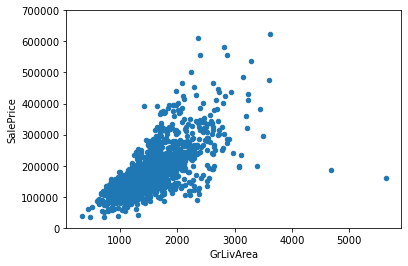

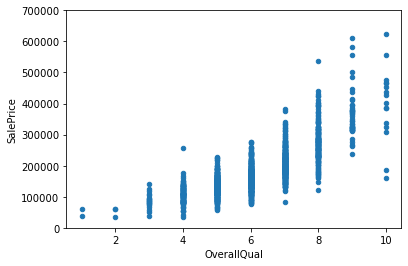

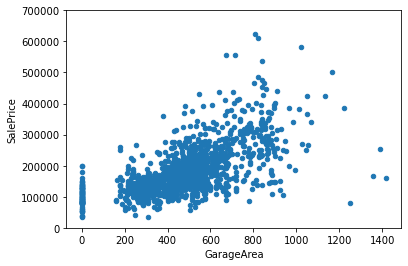

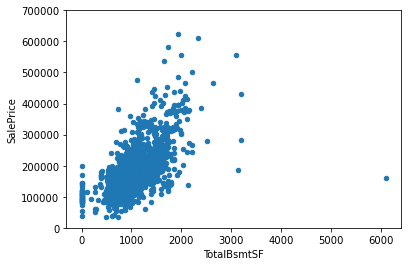

In [8]:
## Plotting scatter plots to show the correlation of the first few features with saleprice
x = ['GrLivArea','OverallQual', 'GarageArea', 'TotalBsmtSF']
for i in x:
    df_train.plot.scatter(i, y='SalePrice', ylim=(0,700000))

In [9]:
print("Correlation between TotalBsmtSF and GrLivArea is: ", df_train['TotalBsmtSF'].corr(df_train['GrLivArea'])) 
print("Correlation between YearBuilt and OverallQual is: ", df_train['YearBuilt'].corr(df_train['OverallQual']))

Correlation between TotalBsmtSF and GrLivArea is:  0.454868202547903
Correlation between YearBuilt and OverallQual is:  0.5723227689623618


# **Heatmap of Correlations**

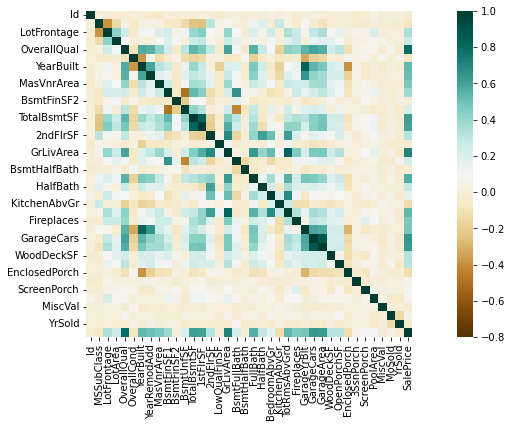

In [10]:
cor_mat = df_train.corr()
f, ax = plt.subplots(figsize=(16, 6))
sns.heatmap(cor_mat, vmax=1, vmin=-0.8, square=True,cmap='BrBG');

# **Missing Values**

In [11]:
train_null = df_train.isnull().sum().sort_values(ascending=False)
train_null.head(22)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
dtype: int64

In [12]:
## calculation of percentage of missing values for each feature
null_percent = round(df_train.isnull().sum()/df_train.isnull().count() * 100, 2).sort_values(ascending=False)
null_percent.head(22)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Id               0.00
Functional       0.00
Fireplaces       0.00
dtype: float64

The first 6 features have more than 15% missing values. Which means it's logical to drop them 
Also it's noted that some features like Garage ... have exactly same null percentage. which can help us later with feature selection.

In [14]:
test_null = df_test.isnull().sum().sort_values(ascending=False)
test_null.head(34)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageQual        78
GarageFinish      78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
TotalBsmtSF        1
Exterior2nd        1
GarageCars         1
Exterior1st        1
GarageArea         1
SaleType           1
MiscVal            0
dtype: int64

In [15]:
## calculation of percentage of missing values for each feature
null_percent2 = round(df_test.isnull().sum()/df_test.isnull().count() * 100, 2).sort_values(ascending=False)
null_percent2.head(22)

PoolQC          99.79
MiscFeature     96.50
Alley           92.67
Fence           80.12
FireplaceQu     50.03
LotFrontage     15.56
GarageYrBlt      5.35
GarageQual       5.35
GarageFinish     5.35
GarageCond       5.35
GarageType       5.21
BsmtCond         3.08
BsmtQual         3.02
BsmtExposure     3.02
BsmtFinType1     2.88
BsmtFinType2     2.88
MasVnrType       1.10
MasVnrArea       1.03
MSZoning         0.27
BsmtHalfBath     0.14
Utilities        0.14
Functional       0.14
dtype: float64

# **Dealing with missing values**

In [16]:
## Dropping the columns that have null_percent over 15%
df_train = df_train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1)
df_train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [17]:
df_test = df_test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1)
df_test.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [18]:
num_col = df_train.columns[df_train.dtypes != 'object'].values
num_col_test = df_test.columns[df_test.dtypes != 'object'].values

In [19]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(random_state=42)


for col in df_train:
    if df_train[col].dtype=="object":
        df_train[col].fillna(df_train[col].mode()[0], inplace=True)
    if df_train[col].dtype=="int":
        df_train[col].fillna(df_train[col].mean(), inplace=True)
        #combi[col].fillna(combi[col].mean(), inplace=True)
    if df_train[col].dtype=='float':
        df_train[col].fillna(df_train[col].mean(), inplace=True)   
df_train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [20]:
df_train.isnull().sum().sort_values(ascending=False)

Id              0
GarageYrBlt     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
               ..
MasVnrArea      0
MasVnrType      0
Exterior2nd     0
Exterior1st     0
SalePrice       0
Length: 75, dtype: int64

In [21]:
imp = IterativeImputer(random_state=42)


for col in df_test:
    if df_test[col].dtype=="object":
        df_test[col].fillna(df_test[col].mode()[0], inplace=True)
    if df_test[col].dtype=="int":
        df_test[col].fillna(df_test[col].mean(), inplace=True)
        #combi[col].fillna(combi[col].mean(), inplace=True)
    if df_test[col].dtype=='float':
        df_test[col].fillna(df_test[col].mean(), inplace=True)
df_test

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,0,700,7,2006,WD,Normal


In [24]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


# **Outliers**

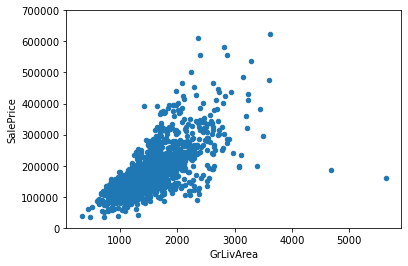

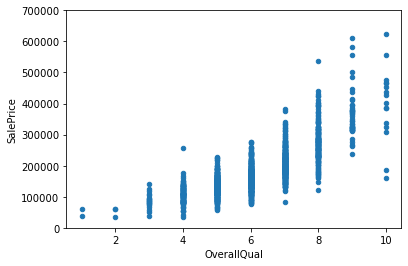

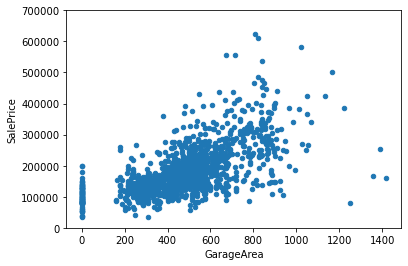

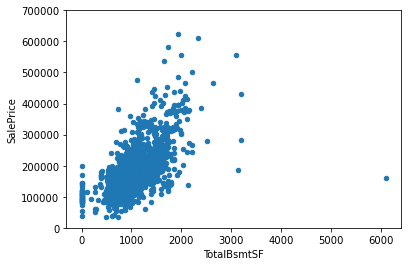

In [25]:
## let's take a look at scatter plots of the most important features
x = ['GrLivArea','OverallQual', 'GarageArea', 'TotalBsmtSF']
for i in x:
    df_train.plot.scatter(i, y='SalePrice', ylim=(0,700000))

In [26]:
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [27]:
df_train.sort_values(by = 'TotalBsmtSF', ascending = False)[:1]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000


In [28]:
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)

In [29]:
df_test = df_test.drop(df_test[df_test['Id'] == 1299].index)
df_test = df_test.drop(df_test[df_test['Id'] == 524].index)
df_test = df_test.drop(df_test[df_test['Id'] == 1299].index)

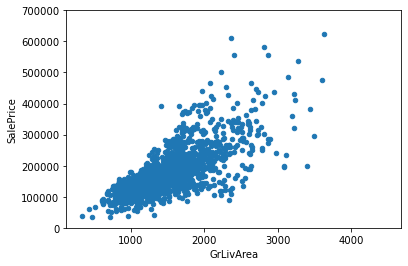

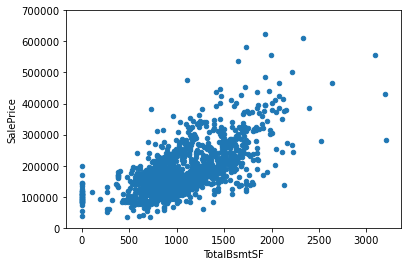

In [30]:
x = ['GrLivArea', 'TotalBsmtSF']
for i in x:
   df_train.plot.scatter(i, y='SalePrice', ylim=(0,700000))

# **Standardizing our features**

/Users/mehradghassemi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

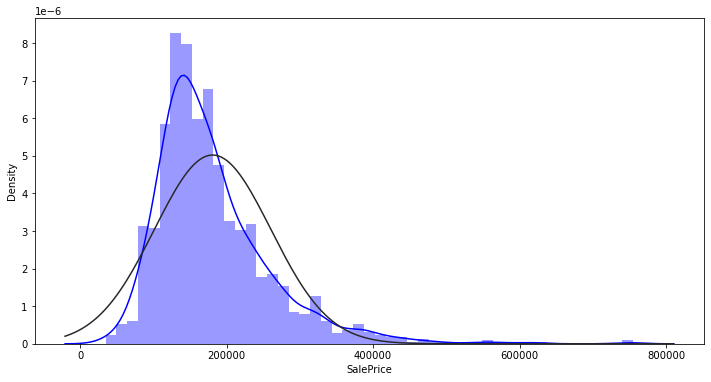

In [31]:
plt.figure(figsize=(12,6))
sns.distplot(df_train['SalePrice'], fit=norm, color='b')
plt.show

In [32]:
# positive skewness requires log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

/Users/mehradghassemi/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

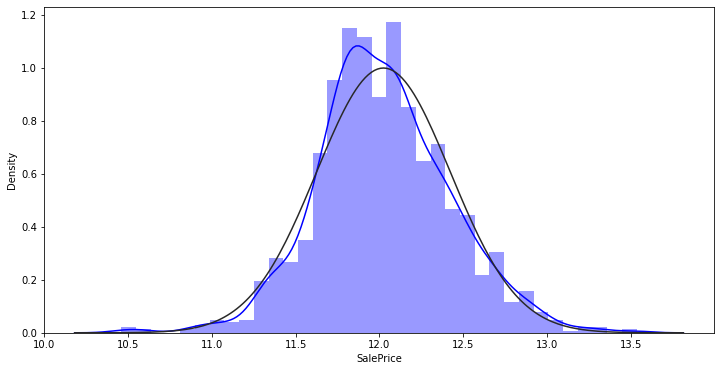

In [33]:
# visualization of Saleprice after normalization 
plt.figure(figsize=(12,6))
sns.distplot(df_train['SalePrice'], fit=norm, color='b')
plt.show

In [34]:
df_train = df_train.drop(['LandSlope', 'MiscVal', 'PoolArea', 'Utilities', '3SsnPorch', 'EnclosedPorch'], axis=1)

In [35]:
df_train = pd.get_dummies(df_train)
df_train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [36]:
df_test = pd.get_dummies(df_test)
df_test.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [37]:
# splitting data
from sklearn.model_selection import train_test_split

X_data = df_train.drop('SalePrice', axis=1)
Y_data = df_train.SalePrice

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.25)
X_train.shape, X_test.shape, Y_train.shape,Y_test.shape

((1093, 260), (365, 260), (1093,), (365,))

In [39]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train, test_size = 0.3)

In [40]:
from sklearn.linear_model import LinearRegression

Linreg = LinearRegression().fit(X_train, Y_train)
print(Linreg.score(X_train, Y_train))

0.9572156436182155


In [41]:
y_pred = Linreg.predict(X_test)
print(Linreg.score(X_test, Y_test))

0.8492674347677421


In [42]:
y_pred_val = Linreg.predict(X_val)
print(Linreg.score(X_val, Y_val))

0.8732739444073246


In [43]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(Y_val, y_pred_val, squared=False)
rmse

0.14354538335931566

In [49]:
pip install xgboost

     |████████████████████████████████| 1.8 MB 4.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [50]:
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [51]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, Y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,Y_train)

    return gsearch.best_params_

In [52]:
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.5,
        learning_rate = 0.05,
        max_depth = 6,
        min_child_weight = 1,
        n_estimators = 1000,
        subsample = 0.7)

%time xgb_model.fit(X_train, Y_train, early_stopping_rounds=5, eval_set=[(X_val, Y_val)], verbose=False)

Y_pred_xgb = xgb_model.predict(X_val)

mae_xgb = mean_absolute_error(Y_val, Y_pred_xgb)

/Users/mehradghassemi/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


CPU times: user 4.55 s, sys: 1.33 s, total: 5.88 s
Wall time: 743 ms


In [53]:
print(xgb_model.score(X_val, Y_val))

0.8894116984967259


In [54]:
Y_pred_test = xgb_model.predict(X_test)
print(xgb_model.score(X_test, Y_test))

0.9047751792240266


In [55]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(Y_val, Y_pred_xgb, squared=False)
rmse

0.13409446894938706

# **Explaining the models**

In [56]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression().fit(X_train, Y_train)

y_pred = model1.predict(X_test)
model1.coef_

array([ 3.02929092e-06,  2.93818248e-04,  2.25176947e-06,  3.77067624e-02,
        4.33159129e-02,  1.89106714e-03,  8.53544440e-04,  1.21547001e-05,
        5.17004001e-05,  3.16580572e-05,  1.68524306e-05,  1.00211102e-04,
        8.44160347e-05,  8.49399611e-05,  1.55300598e-06,  1.70908729e-04,
        3.74284398e-02, -3.14576475e-03,  2.15296573e-03,  5.89816644e-03,
        2.58342115e-03,  1.44800414e-03,  2.50695795e-03,  1.46115127e-02,
       -3.17661277e-04,  2.15100466e-02,  1.40066317e-04,  7.65514177e-05,
        1.21722524e-04,  2.73233780e-04, -1.18306427e-03, -4.09920306e-03,
       -3.63947810e-01,  8.51194506e-02,  1.59424736e-01,  8.49794998e-02,
        3.44241239e-02, -6.45796507e-02,  6.45796507e-02, -2.72873159e-02,
       -2.69786306e-03,  4.78973301e-02, -1.79121511e-02,  4.76861444e-02,
       -9.91019614e-03, -4.85796418e-02,  1.08036935e-02,  8.73005581e-03,
        3.01608228e-02, -4.01232898e-02, -1.13618802e-03,  2.36859926e-03,
       -2.72095775e-02,  

In [57]:
pd.DataFrame(model1.coef_,
            X_train.columns,
            columns=['coefficient'])\
            .sort_values(by='coefficient', ascending=False)   # need to do scaling first for numbers to make sense

,coefficient
SaleType_ConLD,0.603894
SaleType_New,0.587033
GarageCond_Po,0.339698
SaleCondition_Alloca,0.226815
SaleCondition_AdjLand,0.202128
...,...
SaleType_COD,-0.253662
SaleType_WD,-0.267984
MSZoning_C (all),-0.363948
Functional_Maj2,-0.411987


In [58]:
model1.intercept_

13.846396847477394

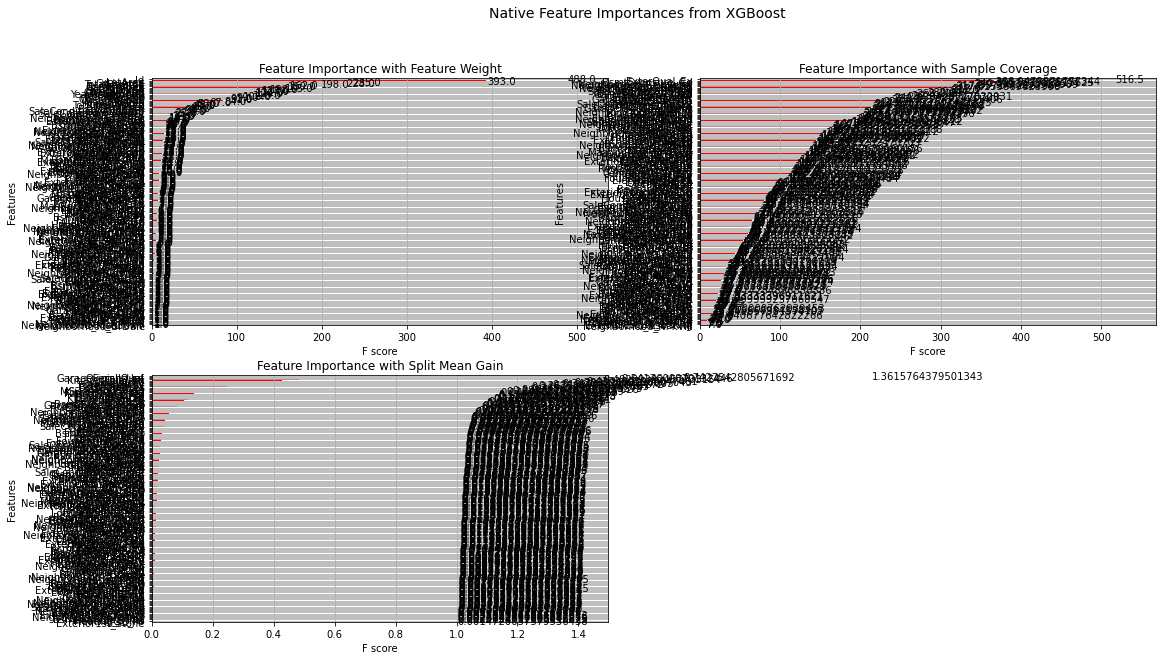

In [60]:
# ploting XGBoost default feature importances
from xgboost import XGBClassifier, plot_importance
fig = plt.figure(figsize = (18, 10))
title = fig.suptitle("Native Feature Importances from XGBoost", fontsize=14)

ax1 = fig.add_subplot(2, 2, 1)
plot_importance(xgb_model, importance_type='weight', ax=ax1, color='red')
ax1.set_title("Feature Importance with Feature Weight");

ax2 = fig.add_subplot(2, 2, 2)
plot_importance(xgb_model, importance_type='cover', ax=ax2, color='red')
ax2.set_title("Feature Importance with Sample Coverage");

ax3 = fig.add_subplot(2, 2, 3)
plot_importance(xgb_model, importance_type='gain', ax=ax3, color='red')
ax3.set_title("Feature Importance with Split Mean Gain");